In [38]:
#Load Data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

"""
#Initial loading of data from cloud to machine. 
def load_housing_data():
    tarball_path = Path("ca_housing_project/data/raw/housing.tgz")
    extract_path = Path("ca_housing_project/data/raw")
    csv_path = extract_path / "housing.csv"

    if not tarball_path.is_file():
        extract_path.mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path=extract_path)

    return pd.read_csv(csv_path)
"""

#Secondary loading of files from Github

import pandas as pd

# The raw content URL for the CSV file on GitHub
url = "https://raw.githubusercontent.com/MikeysPetSnakeCollection/cmse492_aml/main/ca_housing_project/Data/Raw/housing.csv"

# Load the data directly from the URL into a pandas DataFrame
housing = pd.read_csv(url)

housing.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


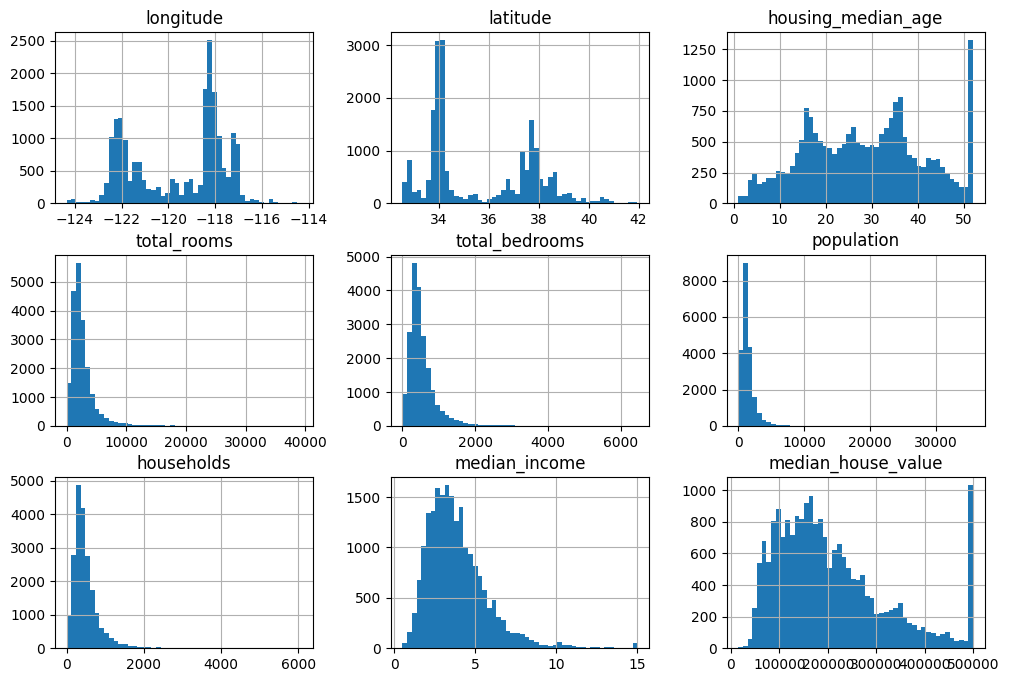

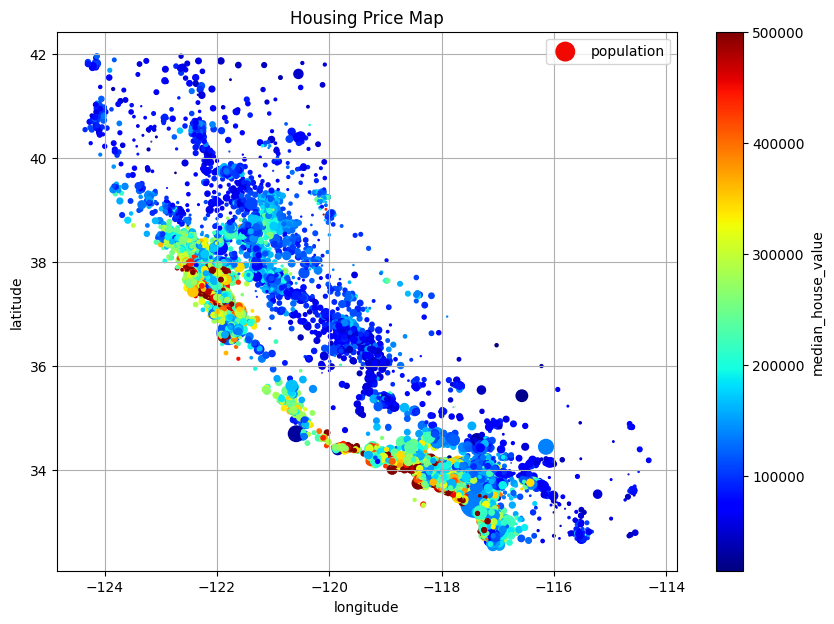

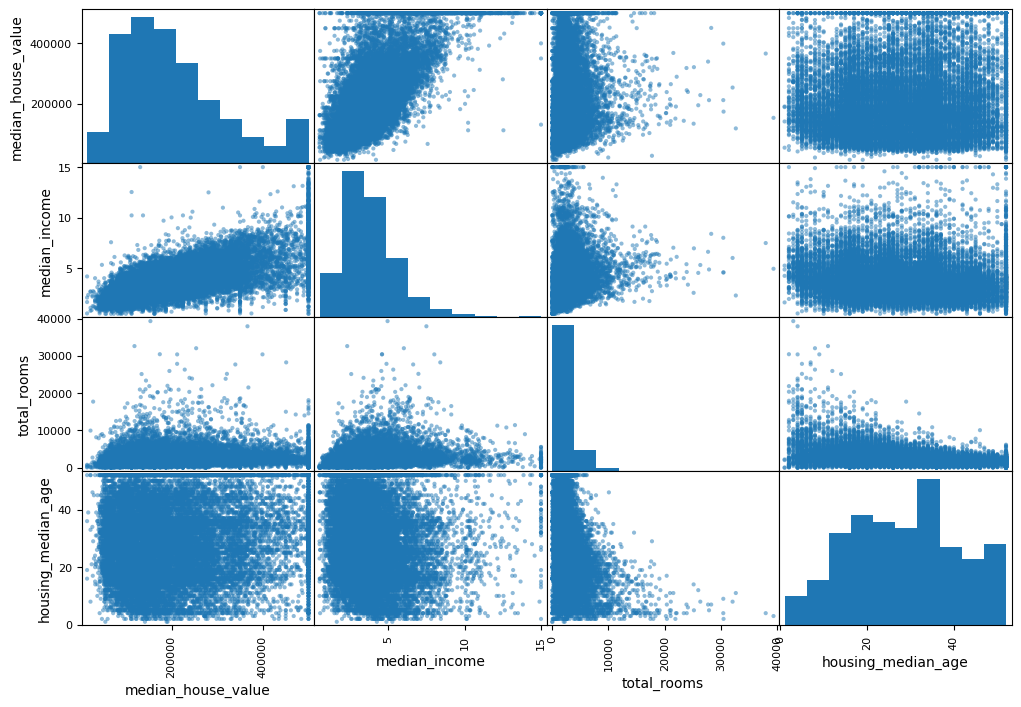

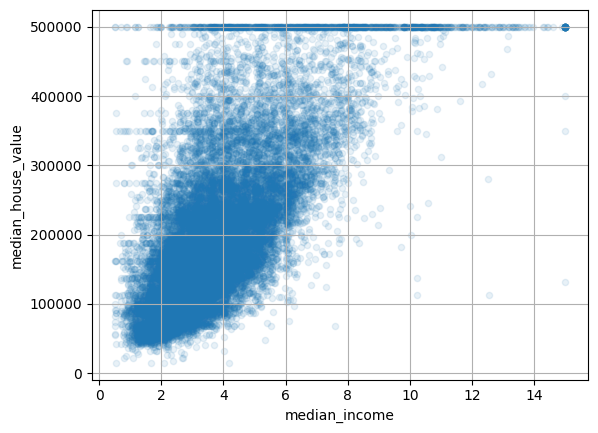

In [29]:
#Data Type Analysis

#Info tells us what data we have to work with
housing.info()

#Initial plots of raw data
import matplotlib.pyplot as plt
import pandas as pd
save_directory = r"C:\Users\Mikey\Documents\GitHub\cmse492_aml\ca_housing_project\Images"





housing.hist(bins=50, figsize=(12, 8))
#plt.show()
plt.savefig(f"{save_directory}/housing_hist.png")


#Housing price map
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
 s=housing["population"] / 100, label="population",
 c="median_house_value", cmap="jet", colorbar=True,
 legend=True, sharex=False, figsize=(10, 7), title="Housing Price Map")
#plt.show()
plt.savefig(f"{save_directory}/housing_price_map.png")

#Correlation Matrix
housing_num = housing.select_dtypes(include='number')
corr_matrix = housing_num.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
plt.savefig(f"{save_directory}/correlation_matrix.png")

#Scatter Matrix
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
#plt.show()
plt.savefig(f"{save_directory}/scatter_matrix.png")

#Median Income scatter matrix
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1, grid=True)
#plt.show()
plt.savefig(f"{save_directory}/median_income_scatter_matrix.png")

In [47]:
# Stratified Tran/Test Splitting

import numpy as np
from sklearn.model_selection import train_test_split

# Add missing features
median = housing["total_bedrooms"].median()  
housing["total_bedrooms"].fillna(median)

# Add in "income category" feature
housing["income_cat"] = pd.cut(housing["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])

#Add in the new features
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]



# Create 1 split set.
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

# remove income category feature
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)


#rename datasets
housing_test = pd.DataFrame(strat_test_set)
housing_train = pd.DataFrame(strat_train_set)


"""
# Renames the datasets and splits in X and Y
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


# Save a checkpoint
housing.to_csv(Path("datasets/housing/Training_set_nolabels.csv"), index=False)
housing_labels.to_csv(Path("datasets/housing/Training_set_labels.csv"), index=False)

"""

housing_test.to_csv(Path("ca_housing_project/Data/Test/housing_test.csv"))
housing_train.to_csv(Path("ca_housing_project/Data/Train/housing_train.csv"))


housing_train.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  